To identify whether a person is eligible for a loan amount based on certain attributes.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('C:/Users/Chinmay Gupta/Desktop/Data set/Loan Prediction/train_data.csv')
test = pd.read_csv('C:/Users/Chinmay Gupta/Desktop/Data set/Loan Prediction/test_data.csv')

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [5]:
train.shape , test.shape

((614, 13), (367, 12))

Variable Identification

In [6]:
# Printing the data types of the variables
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# Printing the first 10 rows of the train data set
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Univariate Analysis

In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# Checking the distribution of the target variable
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
train['Loan_Status'].value_counts()/len(train['Loan_Status'])

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

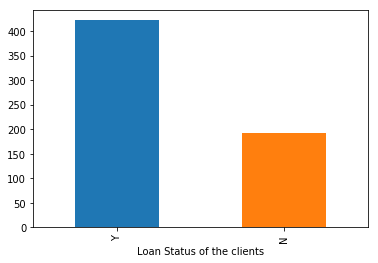

In [11]:
train['Loan_Status'].value_counts().plot.bar()
plt.xlabel('Loan Status of the clients')
plt.show()

In [12]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
train['Education'].value_counts()/len(train['Education'])

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

In [14]:
train['Self_Employed'].value_counts()/len(train['Self_Employed'])

No     0.814332
Yes    0.133550
Name: Self_Employed, dtype: float64

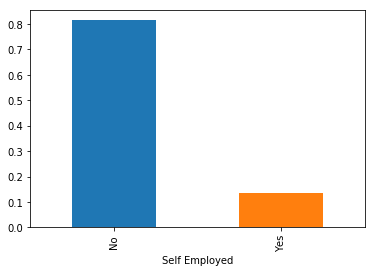

In [15]:
(train['Self_Employed'].value_counts()/len(train['Self_Employed'])).plot.bar()
plt.xlabel('Self Employed')
plt.show()

Bivariate Analysis

In [16]:
c = pd.crosstab(train['Married'],train['Loan_Status'])
print(c)

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


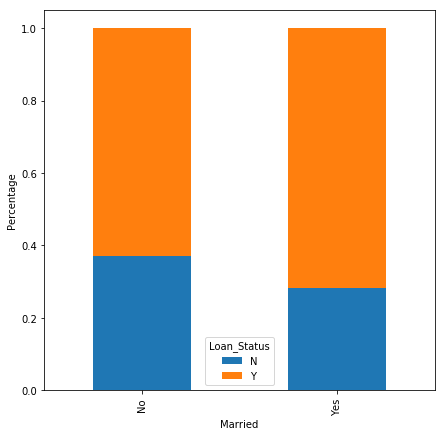

In [17]:
c.div(c.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(7,7))
plt.ylabel('Percentage')
plt.show()

In [18]:
# Calculating the percentage between the Gender & Loan Status 
d = pd.crosstab(train['Gender'],train['Loan_Status'])
print(d)

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


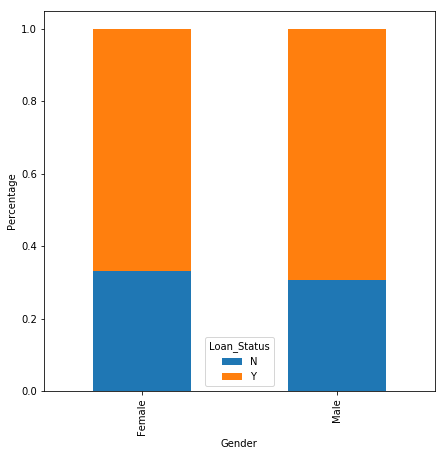

In [19]:
# Plotting a bar graph of the above result
d.div(d.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(7,7))
plt.ylabel('Percentage')
plt.show()

In [20]:
e = pd.crosstab(train['Property_Area'],train['Loan_Status'])
print(e)

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


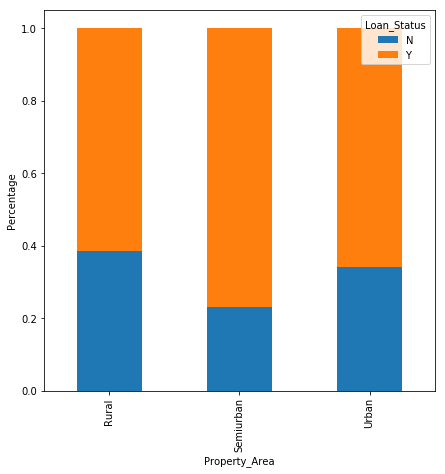

In [21]:
e.div(e.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(7,7))
plt.ylabel('Percentage')
plt.show()

In [22]:
f = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
print(f)

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


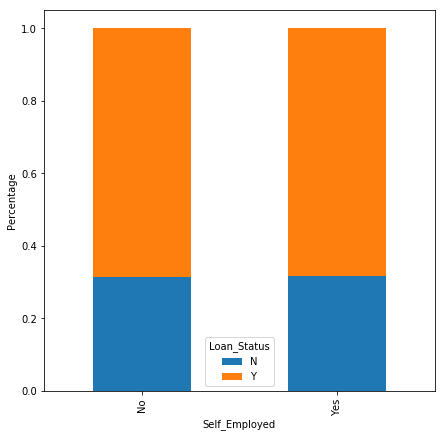

In [23]:
f.div(f.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(7,7))
plt.ylabel('Percentage')
plt.show()

It can be concluded that the people who are self employed or not self employed both are in equal number in taking the loan.

In [24]:
g= pd.crosstab(train['Education'],train['Loan_Status'])
print(c)

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


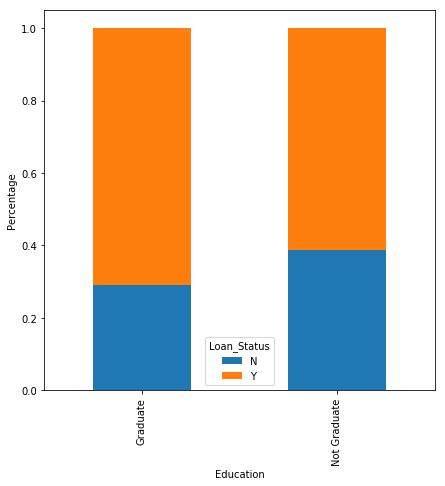

In [25]:
g.div(g.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(7,7))
plt.ylabel('Percentage')
plt.show()

In [26]:
# Replacing the values of the Loan_Status varaibles with 0 & 1 so that correlation can be found out. 
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)
correlation = train.corr()
correlation

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


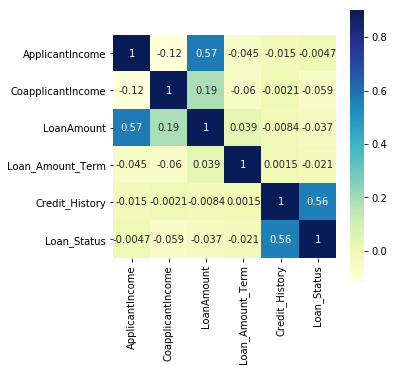

In [27]:
correlation = train.corr()
fig,ax= plt.subplots(figsize=(9,9))
fig.set_size_inches(5,5)
sns.heatmap(correlation,vmax=.9, square=True,annot=True, cmap="YlGnBu")
plt.show()

In [28]:
data = pd.crosstab(train['Loan_Status'],train['Credit_History'])
data

Credit_History,0.0,1.0
Loan_Status,,
0,82,97
1,7,378


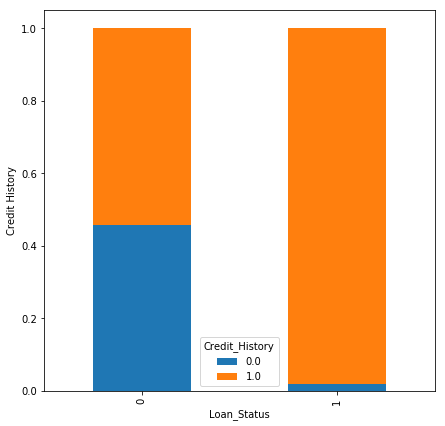

In [29]:
data.div(data.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(7,7))
plt.ylabel('Credit History')
plt.show()

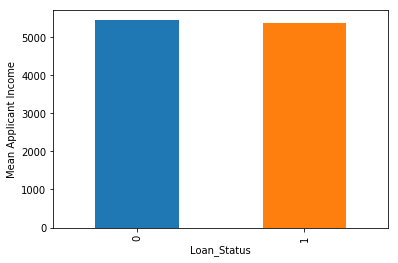

In [30]:
# Representating the relation between Applicant Income & Loan_Status(Indepenent Numerical & Dependent)
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.ylabel('Mean Applicant Income')
plt.show()

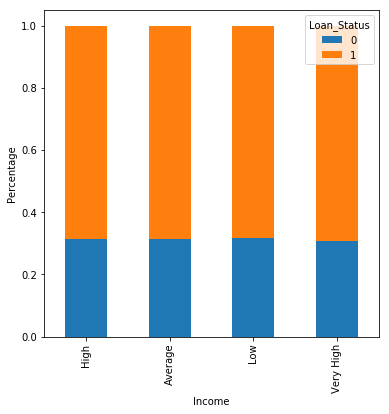

In [31]:
bins = [0,2500,5000,7500,15000]
groups = ['Low','Average','High','Very High']
# Making the Applicant Income column into categorical variable
train['Income'] = pd.cut(train['ApplicantIncome'],bins,labels=groups)
Income = pd.crosstab(train['Income'],train['Loan_Status'])
Income.div(Income.sum(1).astype(int),axis=0).plot(kind='bar',stacked=True,figsize=(6,6))
plt.ylabel('Percentage')
plt.show()

Missing values

In [32]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Income               25
dtype: int64

In [33]:
mv1 = train['Gender'].mode()[0]
train['Gender'].fillna(mv1,inplace=True)

In [34]:
mv2 = train['Married'].mode()[0]
train['Married'].fillna(mv2,inplace=True)

In [35]:
mv3 = train['Dependents'].mode()[0]
train['Dependents'].fillna(mv3,inplace=True)

In [36]:
mv4 = train['Self_Employed'].mode()[0]
train['Self_Employed'].fillna(mv4,inplace=True)

In [37]:
# Will be using the median method because there might outliers in the data set
mv7 = train['LoanAmount'].median()
mv7 = train['LoanAmount'].fillna(mv7,inplace=True)

In [38]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [39]:
mv5 = train['Loan_Amount_Term'].mode()[0]
train['Loan_Amount_Term'].fillna(mv5,inplace=True)

In [40]:
mv6 = train['Credit_History'].mode()[0]
train['Credit_History'].fillna(mv6,inplace=True)

In [41]:
mv7 = train['Income'].mode()[0]
train['Income'].fillna(mv7,inplace=True)

In [42]:
# Checking to see whether all the missing values are filled in the train data set
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [43]:
# Similarly checking the missing values in the test data set
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [44]:
m1 = test['Gender'].mode()[0] 
test['Gender'].fillna(m1,inplace=True)

In [45]:
m2 = test['Dependents'].mode()[0]
test['Dependents'].fillna(m2,inplace=True)

In [46]:
m3 = test['Self_Employed'].mode()[0]
test['Self_Employed'].fillna(m3,inplace=True)

In [47]:
m4 = test['LoanAmount'].median()
test['LoanAmount'].fillna(m4,inplace=True)

In [48]:
m5 = test['Loan_Amount_Term'].mode()[0]
test['Loan_Amount_Term'].fillna(m5,inplace=True)

In [49]:
m6 = test['Credit_History'].mode()[0]
test['Credit_History'].fillna(m6,inplace=True)

In [50]:
# Checking to see whether all the missing values are filled in the test data set
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Model Building

In [51]:
train1 = train.drop('Loan_Status',axis=1)
test1 = train['Loan_Status']

In [52]:
train1 = pd.get_dummies(train1)

Decision Tree

In [53]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train,y_test1 = train_test_split(train1,test1,random_state=100,stratify=test1)

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dete = DecisionTreeClassifier()

In [56]:
dete.fit(x_train1,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
dete.predict(x_test1)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [58]:
dete.score(x_test1,y_test1)

0.7792207792207793

In [59]:
dete.score(x_train1,y_train)

1.0

Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [61]:
# Fitting the data of the train data set
logReg.fit(x_train1,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
logReg.predict(x_test1)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [63]:
logReg.score(x_test1,y_test1)

0.8116883116883117

In [64]:
logReg.score(x_train1,y_train)

0.8195652173913044